<a href="https://colab.research.google.com/github/SJJ0903/20250618-git-basic/blob/main/weather_250723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 계절 관련 시각화

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file = r'/content/drive/MyDrive/post_grouped_1km_250716_1101.csv'
dfdf = pd.read_csv(file, encoding='utf-8')

# 'post_group'이 0이 아닌 행을 조건으로 선택합니다.
condition = dfdf['post_group'] != 0

# 해당 조건의 'post_group' 열의 값을 10으로 나눈 몫으로 업데이트합니다.
dfdf.loc[condition, 'post_group'] = dfdf.loc[condition, 'post_group'] // 10

dfdf.to_csv('post_grouped_1km_mod_postgroup_250723_1110', index=False)

In [34]:
dfdf.columns

Index(['post_group', 'year', 'traffic', 'fence', 'eco', 'agri', 'water',
       '1km_inner', 'count', 'avg_low_temp_springautumn',
       'avg_low_temp_summer', 'avg_low_temp_winter', 'avg_temp_springautumn',
       'avg_temp_summer', 'avg_temp_winter', 'avg_wind_springautumn',
       'avg_wind_summer', 'avg_wind_winter', 'max_snow_springautumn',
       'max_snow_summer', 'max_snow_winter', 'month_total_rain_springautumn',
       'month_total_rain_summer', 'month_total_rain_winter'],
      dtype='object')

# 연도별 평균으로한 계절 관련

In [17]:
df=dfdf[['count','avg_low_temp_springautumn',
       'avg_low_temp_summer', 'avg_low_temp_winter', 'avg_temp_springautumn',
       'avg_temp_summer', 'avg_temp_winter', 'avg_wind_springautumn',
       'avg_wind_summer', 'avg_wind_winter', 'max_snow_springautumn',
       'max_snow_summer', 'max_snow_winter', 'month_total_rain_springautumn',
       'month_total_rain_summer', 'month_total_rain_winter']]
df.to_csv('weather_data.csv', index=False)


In [ ]:
'avg_low_temp_springautumn' = 봄/가을 최저 온도 평균
,'avg_low_temp_summer' = 여름 최저 온도 평균
, 'avg_low_temp_winter'= 겨울 최저 온도 평균
, 'avg_temp_springautumn' = 봄/가을 평균 온도
, 'avg_temp_summer' = 여름 평균 온도
, 'avg_temp_winter' = 겨울 평균 온도
, 'avg_wind_springautumn' = 봄/가을 평균 풍속
, 'avg_wind_summer' = 여름 평균 풍속
, 'avg_wind_winter' = 겨울 평균 풍속
, 'max_snow_springautumn' = 봄/가을 최대 적설량
, 'max_snow_summer' = 여름 최대 적설량
, 'max_snow_winter'= 겨울 최대 적설량
, 'month_total_rain_springautumn' = 봄/가을 월별 총 강수량
, 'month_total_rain_summer' = 여름 월별 총 강수량
, 'month_total_rain_winter' = 여름/겨울 월별 총 강수량


## 폰트 깨진거 rm


In [23]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 시각화 실행

In [69]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 연도별 계절 관련 변화량 - 컬럼 기준

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.



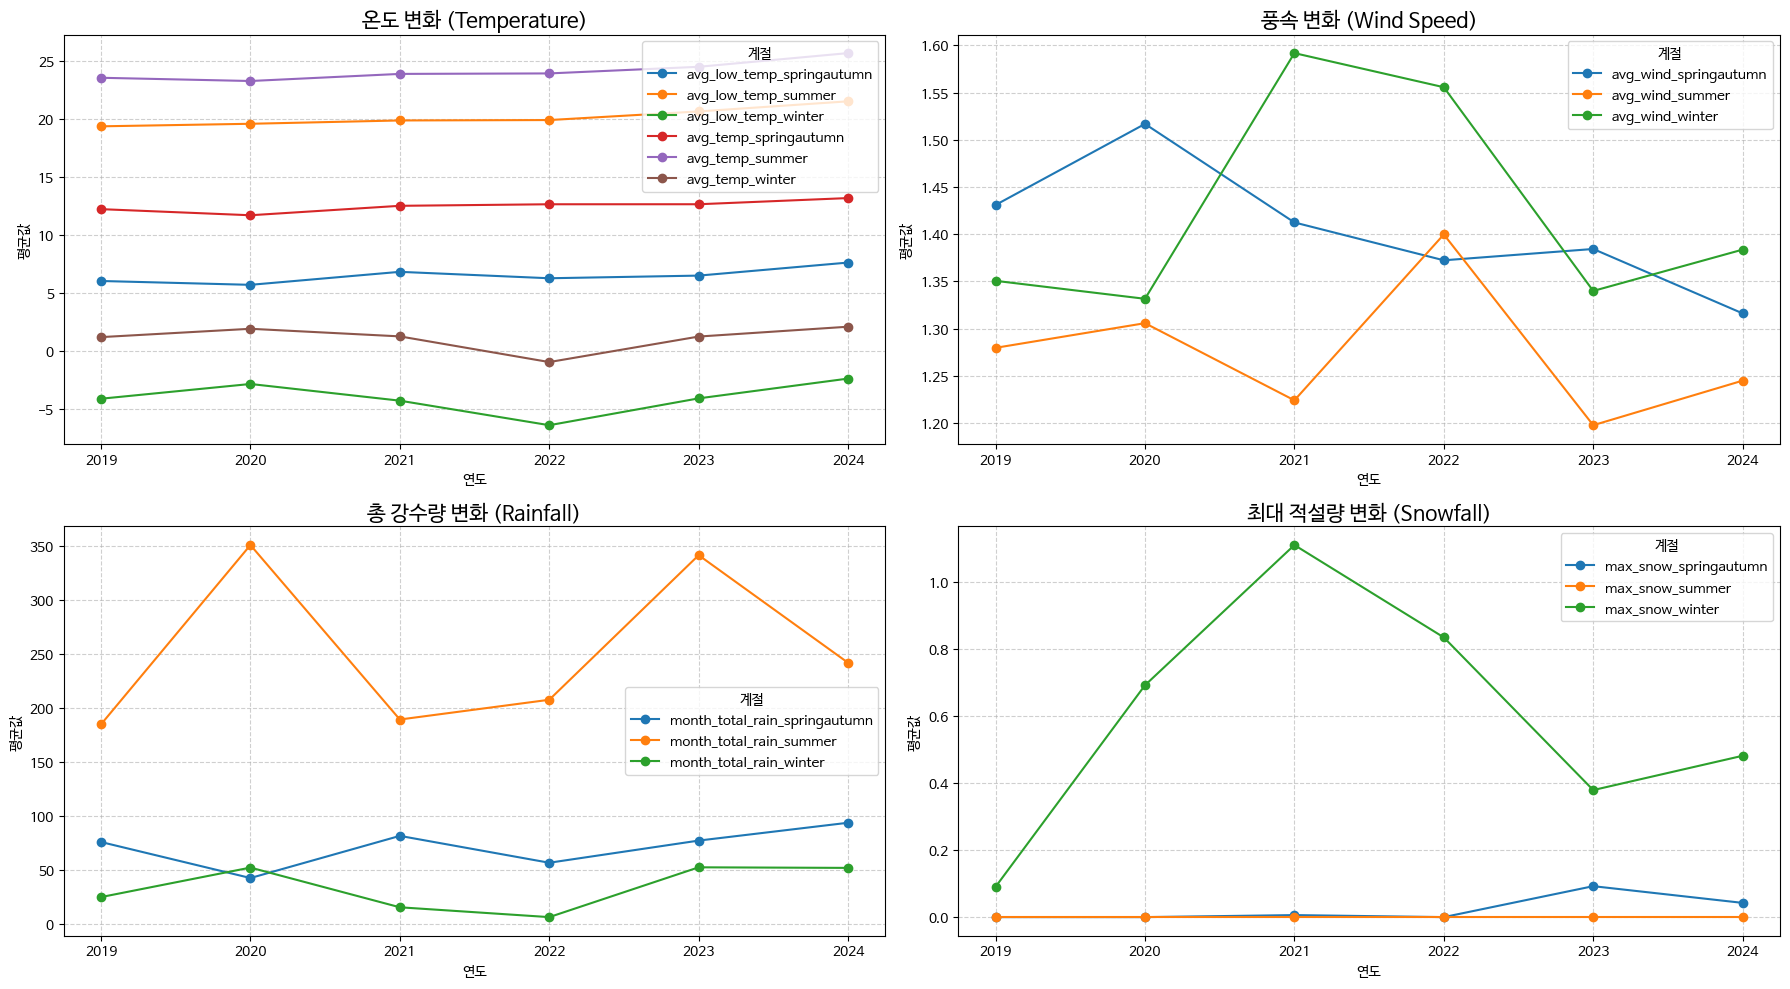

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# # 한글 폰트 설정 (본인 OS에 맞게 수정)
# plt.rc('font', family='Malgun Gothic') # Windows
# plt.rcParams['axes.unicode_minus'] = False

# 1. 원본 데이터 불러오기
# csv_file = '/content/drive/MyDrive/post_grouped_1km_250716_1101.csv'
# df = pd.read_csv(csv_file)


# 2. 연도별로 모든 기상 데이터의 평균 계산
df_yearly_mean = dfdf.groupby('year').mean()

# 3. 시각화할 컬럼 그룹 정의
weather_groups = {
    '온도 변화 (Temperature)': [
        'avg_low_temp_springautumn', 'avg_low_temp_summer', 'avg_low_temp_winter',
        'avg_temp_springautumn', 'avg_temp_summer', 'avg_temp_winter'
    ],
    '풍속 변화 (Wind Speed)': [
        'avg_wind_springautumn', 'avg_wind_summer', 'avg_wind_winter'
    ],
    '총 강수량 변화 (Rainfall)': [
        'month_total_rain_springautumn', 'month_total_rain_summer', 'month_total_rain_winter'
    ],
    '최대 적설량 변화 (Snowfall)': [
        'max_snow_springautumn', 'max_snow_summer', 'max_snow_winter'
    ]
}

# 4. 그룹별로 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.ravel()

for i, (group_name, columns) in enumerate(weather_groups.items()):
    df_yearly_mean[columns].plot(ax=axes[i], style='.-', marker='o')
    axes[i].set_title(group_name, fontsize=15)
    axes[i].set_ylabel("평균값")
    axes[i].set_xlabel("연도")
    axes[i].legend(title='계절')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 연도별 계절 관련 변화량 - 계절 단위

# 로드킬 발생건별 계절 추이

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.



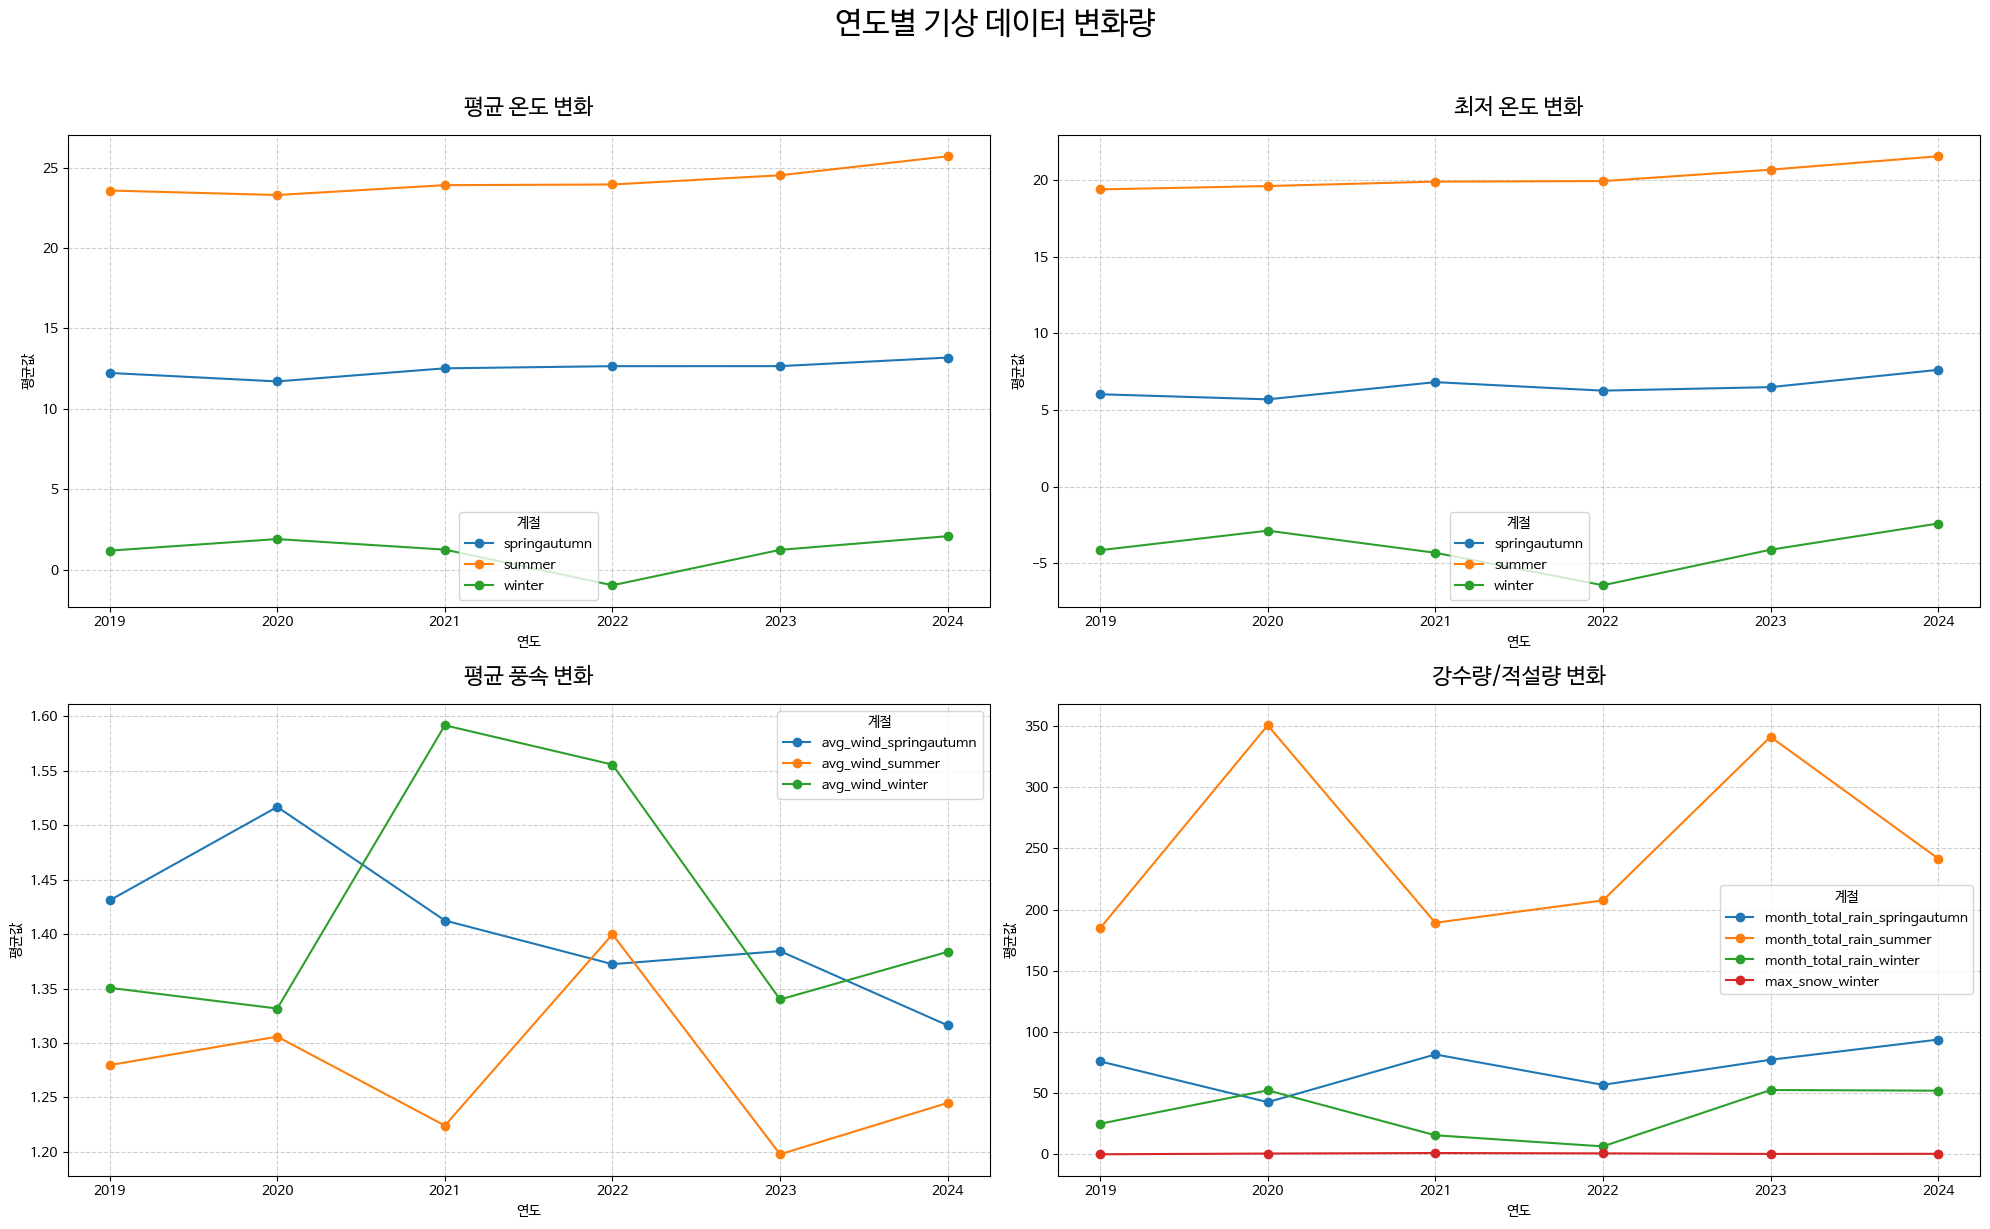

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. 연도별 평균 계산
df_yearly_mean = dfdf.groupby('year').mean()

# 3. 시각화할 컬럼 그룹 세분화
weather_groups = {
    '평균 온도 변화': [
        'avg_temp_springautumn', 'avg_temp_summer', 'avg_temp_winter'
    ],
    '최저 온도 변화': [
        'avg_low_temp_springautumn', 'avg_low_temp_summer', 'avg_low_temp_winter'
    ],
    '평균 풍속 변화': [
        'avg_wind_springautumn', 'avg_wind_summer', 'avg_wind_winter'
    ],
    '강수량/적설량 변화': [
        'month_total_rain_springautumn', 'month_total_rain_summer', 'month_total_rain_winter',
        'max_snow_winter' # 대표적으로 겨울 적설량만 추가
    ]
}

# 4. 2x2 격자에 그룹별 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

# 각 그룹에 대해 선 그래프 그리기
for i, (group_name, columns) in enumerate(weather_groups.items()):
    # 컬럼 이름에서 'avg_temp_' 같은 부분을 제거하여 범례(legend)를 간결하게 만듭니다.
    simple_labels = [col.replace('avg_temp_', '').replace('avg_low_temp_', '') for col in columns]

    df_yearly_mean[columns].plot(ax=axes[i], style='.-', marker='o')
    axes[i].set_title(group_name, fontsize=16, pad=15)
    axes[i].set_ylabel("평균값")
    axes[i].set_xlabel("연도")
    axes[i].legend(simple_labels, title='계절') # 간결한 범례 사용
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('연도별 기상 데이터 변화량', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

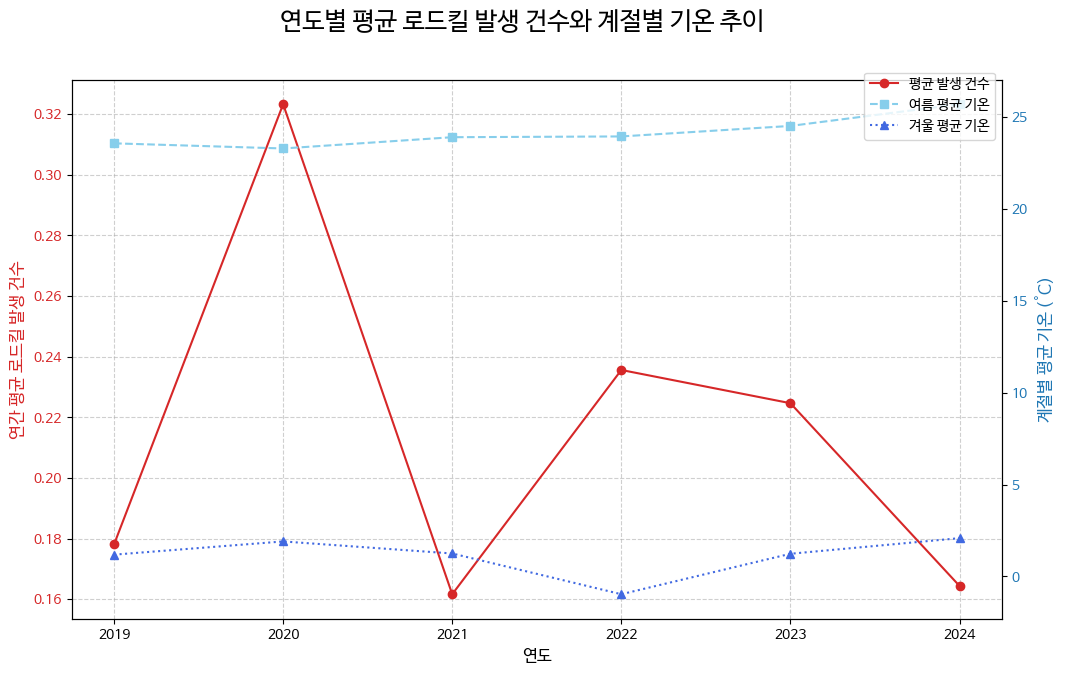

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# 2. 연도별로 평균 계산
df_yearly_mean = dfdf.groupby('year').mean()

# 3. 이중 축 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 7))

# 첫 번째 Y축 (왼쪽): 로드킬 발생 건수
color1 = 'tab:red'
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('연간 평균 로드킬 발생 건수', color=color1, fontsize=12)
ax1.plot(df_yearly_mean.index, df_yearly_mean['count'], color=color1, marker='o', linestyle='-', label='평균 발생 건수')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle='--', alpha=0.6)

# 두 번째 Y축 (오른쪽): 계절별 평균 기온
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('계절별 평균 기온 ($^°$C)', color=color2, fontsize=12)
ax2.plot(df_yearly_mean.index, df_yearly_mean['avg_temp_summer'], color='skyblue', marker='s', linestyle='--', label='여름 평균 기온')
ax2.plot(df_yearly_mean.index, df_yearly_mean['avg_temp_winter'], color='royalblue', marker='^', linestyle=':', label='겨울 평균 기온')
ax2.tick_params(axis='y', labelcolor=color2)

# 그래프 제목 및 범례
fig.suptitle('연도별 평균 로드킬 발생 건수와 계절별 기온 추이', fontsize=18)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()

In [43]:
df_post_mean = dfdf.groupby('post_group').mean().reset_index()
df_post_mean['year'].head()

,year
0,2021.5
1,2021.5
2,2021.5
3,2021.5
4,2021.5


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" 

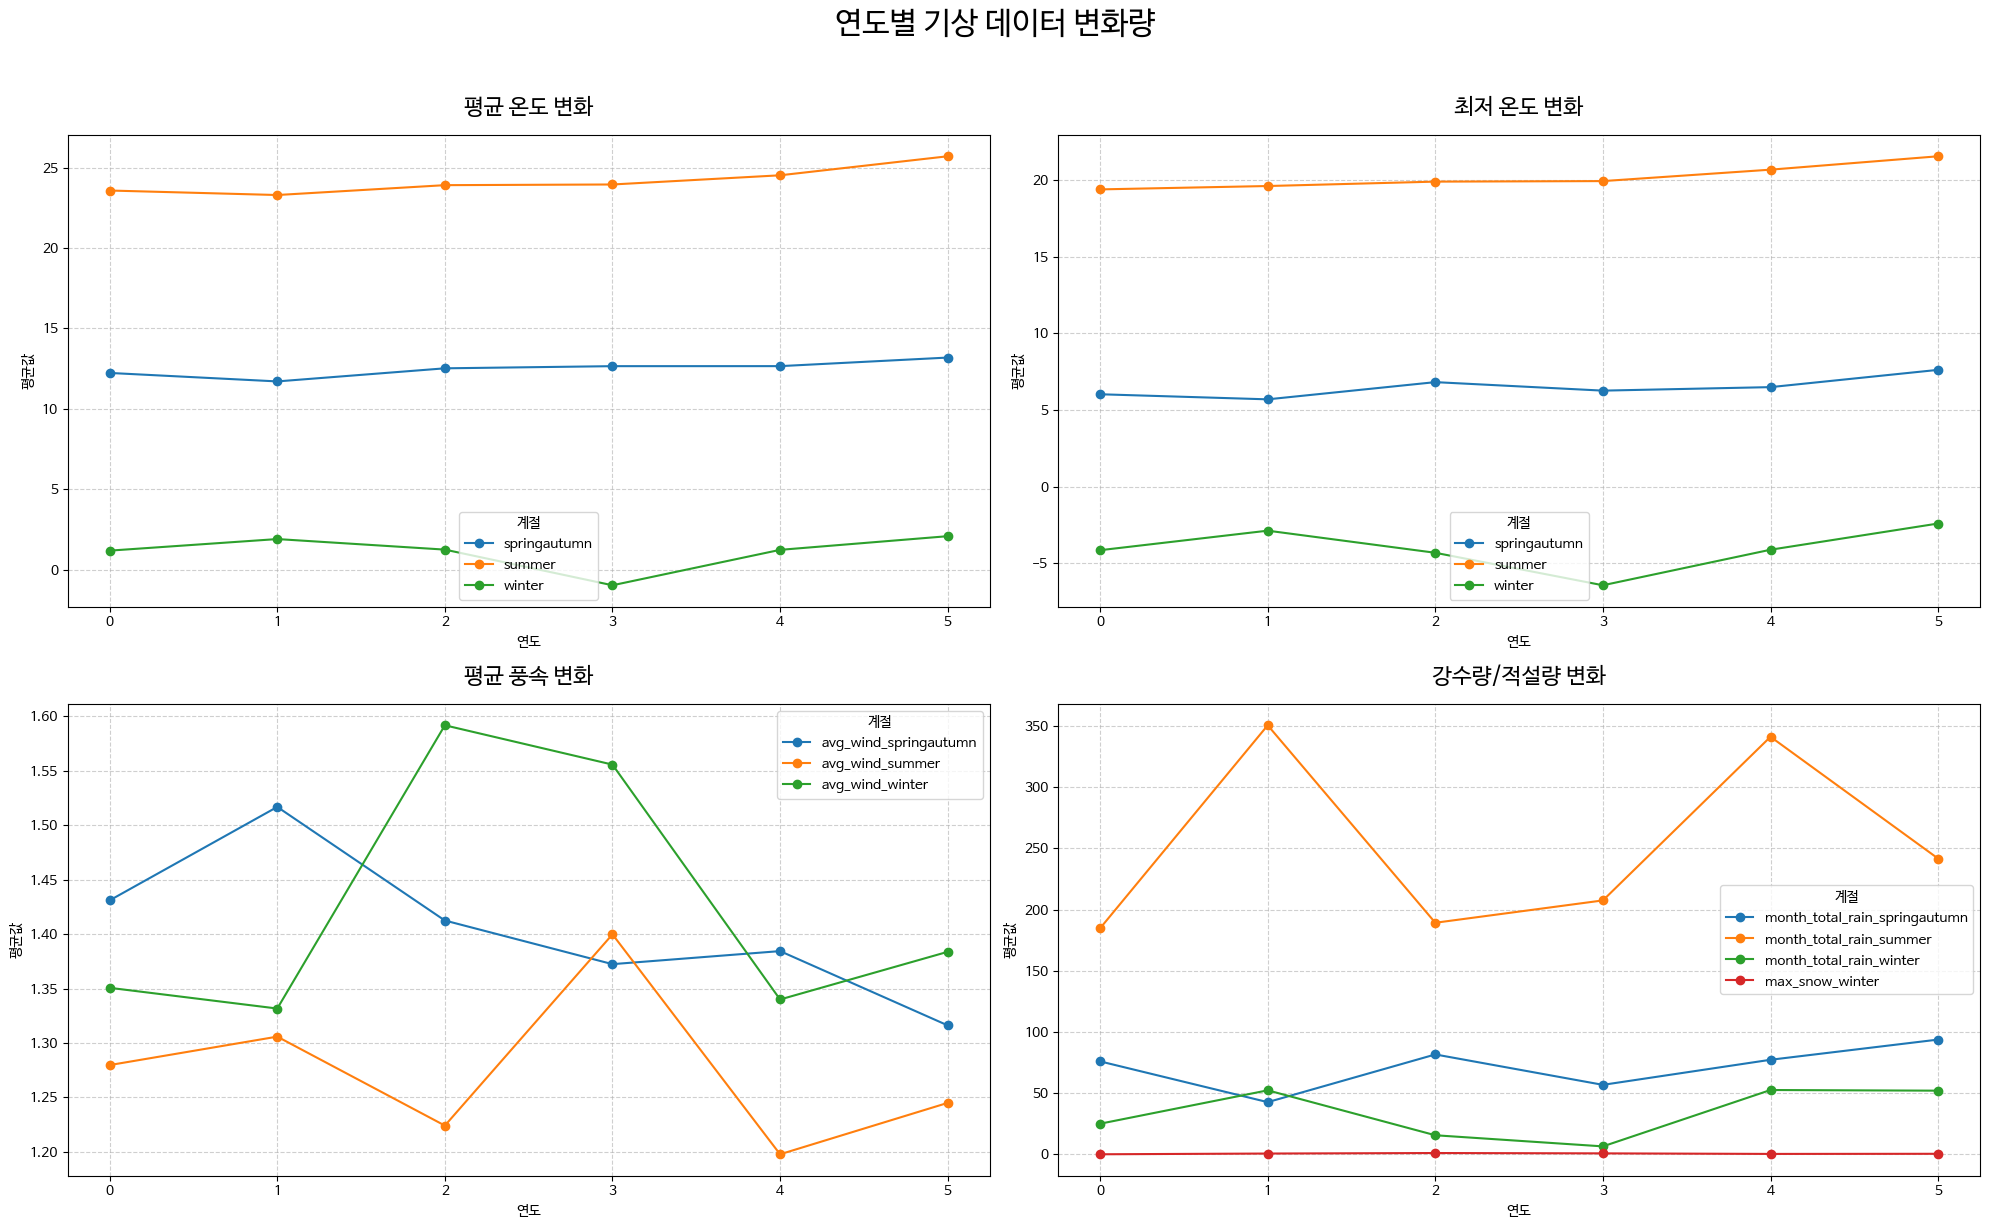

In [44]:
# dfdf_mean = dfdf.groupby('post_group').mean().reset_index()


# 2. 연도별로 평균 계산
df_post_mean = dfdf.groupby('year').mean().reset_index()


# 3. 시각화할 컬럼 그룹 세분화
weather_groups = {
    '평균 온도 변화': [
        'avg_temp_springautumn', 'avg_temp_summer', 'avg_temp_winter'
    ],
    '최저 온도 변화': [
        'avg_low_temp_springautumn', 'avg_low_temp_summer', 'avg_low_temp_winter'
    ],
    '평균 풍속 변화': [
        'avg_wind_springautumn', 'avg_wind_summer', 'avg_wind_winter'
    ],
    '강수량/적설량 변화': [
        'month_total_rain_springautumn', 'month_total_rain_summer', 'month_total_rain_winter',
        'max_snow_winter' # 대표적으로 겨울 적설량만 추가
    ]
}

# 4. 2x2 격자에 그룹별 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

# 각 그룹에 대해 선 그래프 그리기
for i, (group_name, columns) in enumerate(weather_groups.items()):
    # 컬럼 이름에서 'avg_temp_' 같은 부분을 제거하여 범례(legend)를 간결하게 만듭니다.
    simple_labels = [col.replace('avg_temp_', '').replace('avg_low_temp_', '') for col in columns]

    df_post_mean[columns].plot(ax=axes[i], style='.-', marker='o')
    axes[i].set_title(group_name, fontsize=16, pad=15)
    axes[i].set_ylabel("평균값")
    axes[i].set_xlabel("연도")
    axes[i].legend(simple_labels, title='계절') # 간결한 범례 사용
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('연도별 기상 데이터 변화량', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

In [53]:
pip install plotly

In [59]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import webbrowser
from google.colab import files

# 1. 데이터 준비 (기존 코드와 동일)
file = r'/content/drive/MyDrive/post_grouped_1km_250716_1101.csv'
df = pd.read_csv(file, encoding='utf-8')

condition = df['post_group'] != 0
df.loc[condition, 'post_group'] = df.loc[condition, 'post_group'] // 10

column_rename_map = {
    'count' : '로드킬 발생', 'avg_low_temp_springautumn': '봄/가을 최저 온도 평균',
    'avg_low_temp_summer': '여름 최저 온도 평균', 'avg_low_temp_winter': '겨울 최저 온도 평균',
    'avg_temp_springautumn': '봄/가을 평균 온도', 'avg_temp_summer': '여름 평균 온도',
    'avg_temp_winter': '겨울 평균 온도', 'avg_wind_springautumn': '봄/가을 평균 풍속',
    'avg_wind_summer': '여름 평균 풍속', 'avg_wind_winter': '겨울 평균 풍속',
    'max_snow_springautumn': '봄/가을 최대 적설량', 'max_snow_summer': '여름 최대 적설량',
    'max_snow_winter': '겨울 최대 적설량', 'month_total_rain_springautumn': '봄/가을 월별 총 강수량',
    'month_total_rain_summer': '여름 월별 총 강수량', 'month_total_rain_winter': '겨울 월별 총 강수량'
}
df = df.rename(columns=column_rename_map)
df_yearly_mean = df.groupby('year').mean()

# 2. 시각화 그룹 정의 (기존 코드와 동일)
weather_groups = {
    '온도 변화 (Temperature)': [
        '봄/가을 최저 온도 평균', '여름 최저 온도 평균', '겨울 최저 온도 평균',
        '봄/가을 평균 온도', '여름 평균 온도', '겨울 평균 온도'
    ],
    '풍속 변화 (Wind Speed)': [
        '봄/가을 평균 풍속', '여름 평균 풍속', '겨울 평균 풍속'
    ],
    '총 강수량 변화 (Rainfall)': [
        '봄/가을 월별 총 강수량', '여름 월별 총 강수량', '겨울 월별 총 강수량'
    ],
    '최대 적설량 변화 (Snowfall)': [
        '봄/가을 최대 적설량', '여름 최대 적설량', '겨울 최대 적설량'
    ]
}

# 3. Plotly로 2x2 서브플롯 생성
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(weather_groups.keys())
)

# 4. 각 그룹에 대해 선 그래프 추가
group_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, (group_name, columns) in enumerate(weather_groups.items()):
    row, col = group_positions[i]
    for column_name in columns:
        fig.add_trace(
            go.Scatter(
                x=df_yearly_mean.index,
                y=df_yearly_mean[column_name],
                mode='lines+markers',
                name=column_name.replace(' 평균', '').replace('월별 총 ', '') # 범례 이름
            ),
            row=row, col=col
        )

# 5. 전체 레이아웃 업데이트 (✅ 스타일링 적용)
fig.update_layout(
    title_text='연도별 기상 데이터 변화량',
    title_font_size=24,
    template='plotly_dark',  # 'plotly_dark', 'ggplot2', 'seaborn' 등 다양한 테마 적용 가능

    paper_bgcolor='rgba(0,0,0,0)',  # 전체 배경 투명하게
    plot_bgcolor='rgba(0,0,0,0)',   # 그래프 영역 배경 투명하게

    font=dict(
        family="Malgun Gothic, sans-serif", # 폰트 지정
        size=12,
        color="white" # 폰트 색상
    ),

    legend_title_text='구분',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(
            size=10
        )
    )
)

# 6. HTML 파일로 저장
fig.write_html("weather_trends_styled.html")

print("✅ 'weather_trends_styled.html' 파일이 저장되었습니다.")
files.download("weather_trends_styled.html")

✅ 'weather_trends_styled.html' 파일이 저장되었습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

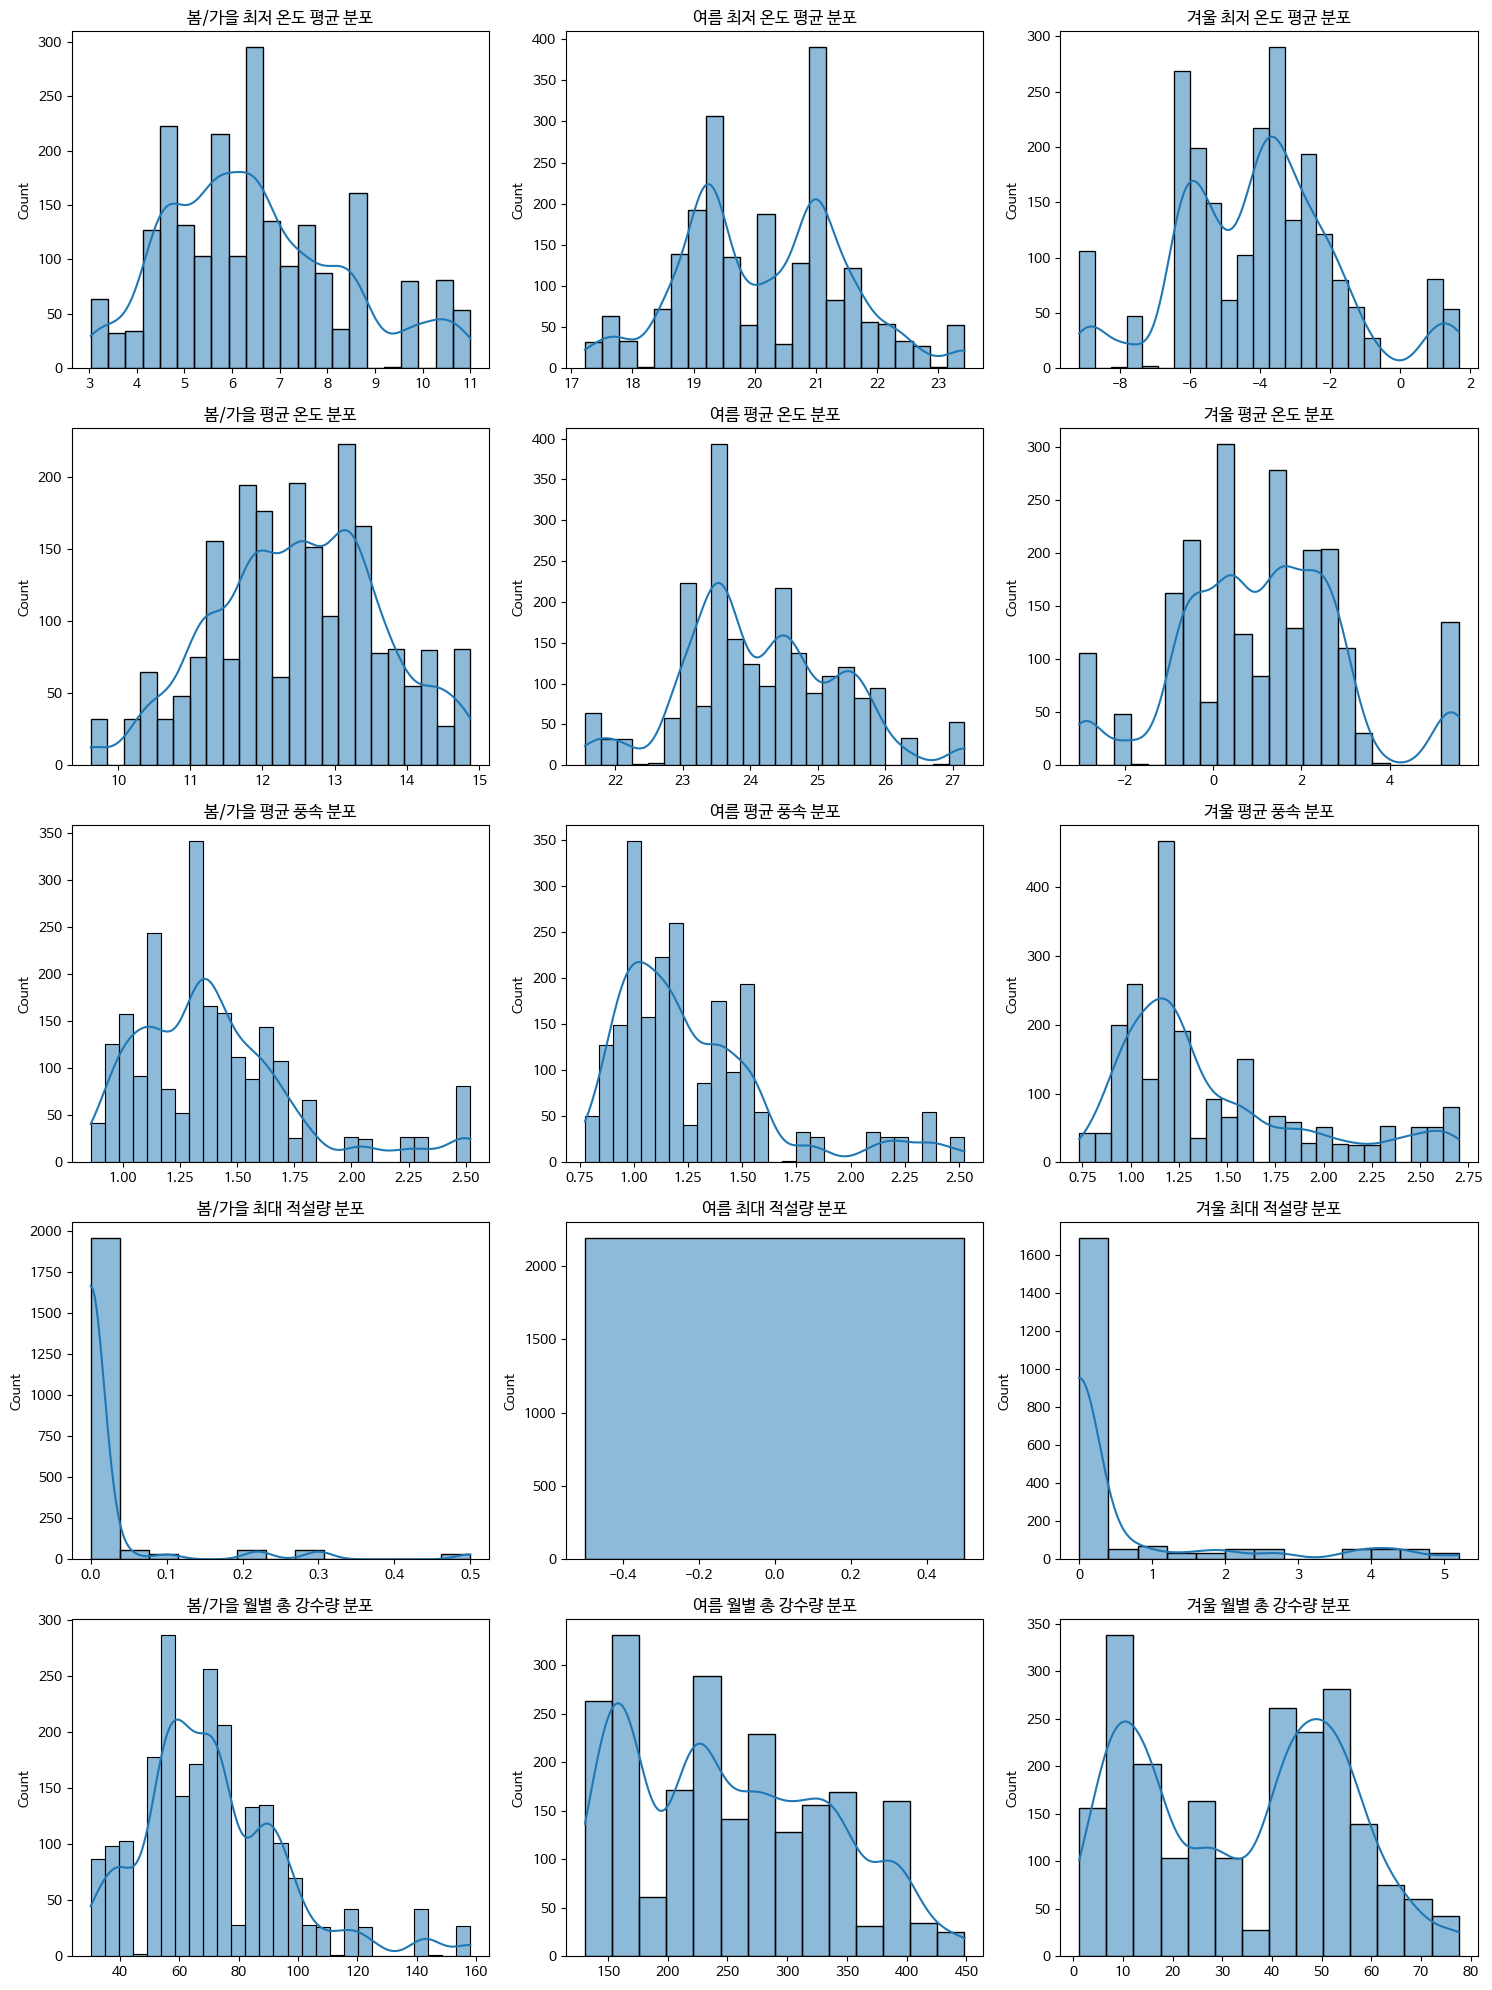

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 15개 그래프를 담을 격자(figure) 생성
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.ravel() # 2차원 배열을 1차원으로 변환

# 각 컬럼에 대해 히스토그램 그리기
for i, col in enumerate(df_renamed.columns):
    sns.histplot(df_renamed[col], ax=axes[i], kde=True)
    axes[i].set_title(f'{col} 분포')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

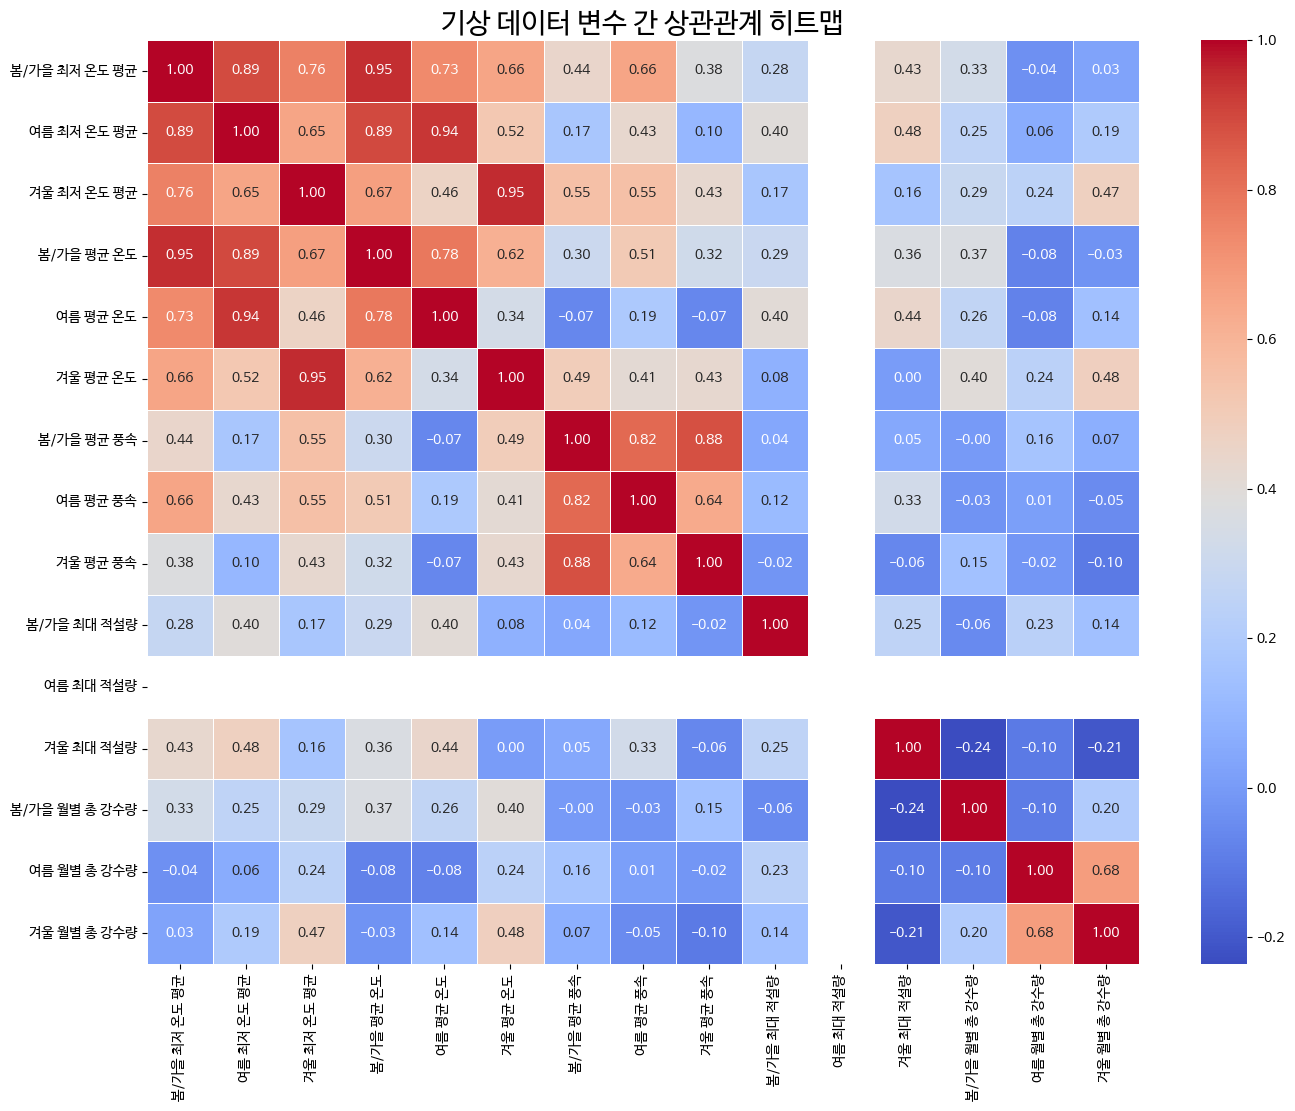

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. 상관관계 행렬 계산
corr_matrix = df_renamed.corr()

# 2. 히트맵 그리기
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('기상 데이터 변수 간 상관관계 히트맵', fontsize=20)
plt.show()